Домашнее задание
Как найти стог сена в иголке? Практический проект по построению системы поиска аномалий.

Цель:
В этом домашнем задании вам предстоит настроить систему по поиску аномалий в банковских транзакциях. Мало того, что аномальных значений в данных меньше одного процента, так еще и переменные анонимизированные и представляют собой первые 28 главных компонент, полученных после PCA преобразования оригинальных данных (о которых мы ничего не знаем).

Смогут ли бравые unsupervised методы справится с такой задачей? Можно ли работать в таких условиях? Кто подставил кролика Роджера? Ответы на некоторые их этих вопросов вы узнаете после выполнения задания :)


Описание/Пошаговая инструкция выполнения домашнего задания:

 - Скачайте датасет с https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv

 - Проведите небольшой EDA (гистограммы и описательные статистики - обязательно).

 - Воспользуйтесь процентом аномалий, подсчитанным по переменной Class, как "экспертной оценкой" загрязненности нашего датасета.

 - Попробуйте построить различные модели и алгоритмы, разобранные на занятии, используя полученную экспертную оценку для настройки параметров.

 - Воспользуйтесь стандартными методами оценки качества бинарной классификации (особенно хорошо подойдёт classification report и confusion matrix), и, используя предсказания моделей и переменную Class, проверьте, действительно ли модели справляются со своей задачей и на сколько хорошо они это делают.

 - При помощи tSNE и/или UMAP, постройте сжатое представление исходных данных и проверьте, действительно ли аномалии лежат достаточно далеко от основной массы точек.

In [1]:
# импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Скачайте датасет 
https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
#компьютер с массивом 284807х31 не справляется, возьму 1/7 от data
df = data.copy()
df = df.sample(n=df.shape[0]//7, random_state=42)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


- Time - количество секунд между каждой транзакцией и первой транзакцией
- Amount - Сумма транзакции
- Class - Мошенническая транзакция или нет

In [5]:
df.shape

(40686, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40686 entries, 43428 to 149925
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    40686 non-null  float64
 1   V1      40686 non-null  float64
 2   V2      40686 non-null  float64
 3   V3      40686 non-null  float64
 4   V4      40686 non-null  float64
 5   V5      40686 non-null  float64
 6   V6      40686 non-null  float64
 7   V7      40686 non-null  float64
 8   V8      40686 non-null  float64
 9   V9      40686 non-null  float64
 10  V10     40686 non-null  float64
 11  V11     40686 non-null  float64
 12  V12     40686 non-null  float64
 13  V13     40686 non-null  float64
 14  V14     40686 non-null  float64
 15  V15     40686 non-null  float64
 16  V16     40686 non-null  float64
 17  V17     40686 non-null  float64
 18  V18     40686 non-null  float64
 19  V19     40686 non-null  float64
 20  V20     40686 non-null  float64
 21  V21     40686 non-null  float6

In [7]:
df['Class'].value_counts(normalize = True) 

0    0.998255
1    0.001745
Name: Class, dtype: float64

In [8]:
df['Class'].value_counts(normalize = False) 

0    40615
1       71
Name: Class, dtype: int64

In [9]:
df.groupby('Class')[['Amount']].agg(['mean', 'median', 'count']) # -> какие суммы в аномалиях?

Amount              
             mean median  count
Class                          
0       87.205575  22.00  40615
1      185.049437  11.38     71

In [10]:
df.describe() #базовые статистики датасета

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,40686.000000,40686.000000,40686.000000,40686.000000,40686.000000,40686.000000,40686.000000,40686.000000,40686.000000,40686.000000,...,40686.000000,40686.000000,40686.000000,40686.000000,40686.000000,40686.000000,40686.000000,40686.000000,40686.000000,40686.000000
mean,94953.535049,-0.004670,-0.000216,0.002902,0.002947,0.001806,0.003020,-0.003753,-0.001557,-0.003490,...,-0.003302,0.005812,0.000898,-0.000147,0.004157,0.001506,0.003264,-0.002884,87.376320,0.001745
std,47470.584948,1.965232,1.642024,1.517764,1.418128,1.355480,1.322722,1.209729,1.217542,1.106772,...,0.734752,0.726060,0.593554,0.608436,0.520738,0.481727,0.410237,0.326561,223.817624,0.041738
min,0.000000,-34.148234,-48.060856,-33.680984,-5.560118,-23.669726,-20.869626,-41.506796,-50.420090,-13.434066,...,-22.889347,-8.887017,-22.575000,-2.824849,-3.963454,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54493.250000,-0.917298,-0.601805,-0.890959,-0.846213,-0.701826,-0.766472,-0.561983,-0.211618,-0.646914,...,-0.227858,-0.538606,-0.164109,-0.355267,-0.314165,-0.325246,-0.070833,-0.053336,5.640000,0.000000
50%,84766.000000,0.018102,0.063455,0.180376,-0.022244,-0.049224,-0.274167,0.033398,0.021047,-0.053769,...,-0.029463,0.013265,-0.013677,0.042376,0.025028,-0.050483,0.001211,0.010476,22.000000,0.000000
75%,139355.750000,1.318353,0.800686,1.037861,0.742653,0.618692,0.406278,0.573009,0.324148,0.589199,...,0.186849,0.530068,0.145081,0.438642,0.351189,0.242061,0.090515,0.077960,77.040000,0.000000
max,172782.000000,2.439207,21.467203,9.382558,12.699542,29.016124,16.493227,21.437514,17.052566,15.594995,...,27.202839,8.361985,22.083545,3.990646,6.070850,3.004455,9.200883,15.942151,5239.500000,1.000000


## Вывод: познакомился с дата-сетом

# 2 Проведите небольшой EDA (гистограммы и описательные статистики - обязательно)

## Пропуски

In [11]:
df.isnull().sum().sum()

0

In [12]:
# посмотреть наполняемость. выведу через print(list()) по вертикали меньше места (спойлер, потому что нет пропуков)
print(df.isnull().sum().sum()) #сумма числа пропусков
print(dict(df.isnull().sum())) # пропуски по столбцам

0
{'Time': 0, 'V1': 0, 'V2': 0, 'V3': 0, 'V4': 0, 'V5': 0, 'V6': 0, 'V7': 0, 'V8': 0, 'V9': 0, 'V10': 0, 'V11': 0, 'V12': 0, 'V13': 0, 'V14': 0, 'V15': 0, 'V16': 0, 'V17': 0, 'V18': 0, 'V19': 0, 'V20': 0, 'V21': 0, 'V22': 0, 'V23': 0, 'V24': 0, 'V25': 0, 'V26': 0, 'V27': 0, 'V28': 0, 'Amount': 0, 'Class': 0}


In [13]:
#df.isna().sum()/df.shape[0] т.к. пропусков нет, этот шаг закоментировал

### Пропусков нет 

## Визуалиализация столбцов

C:\Users\smndy\AppData\Local\Temp\ipykernel_5160\4086520999.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (7,3))


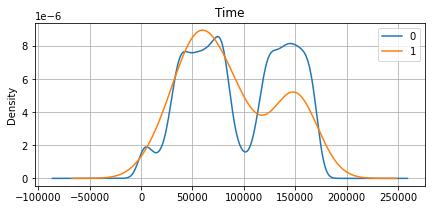

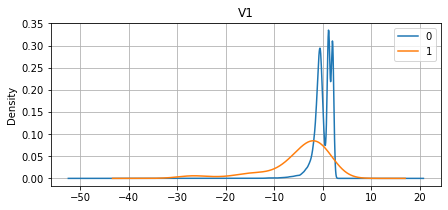

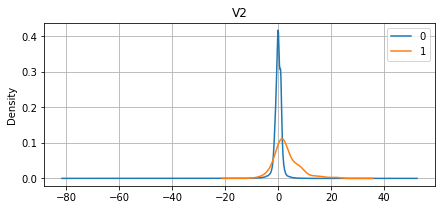

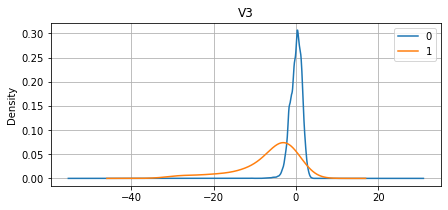

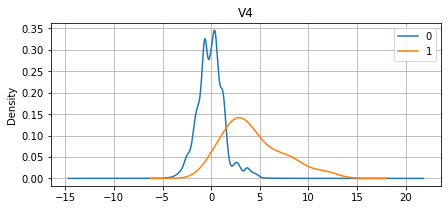

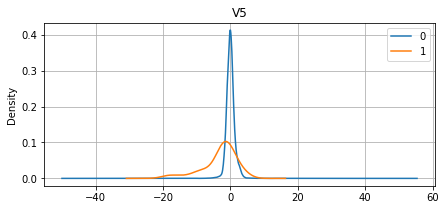

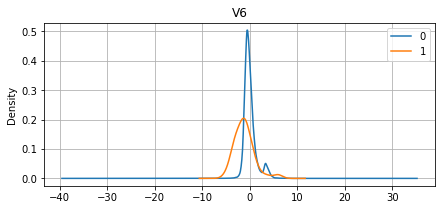

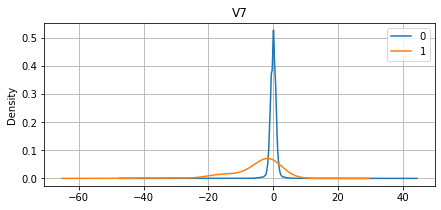

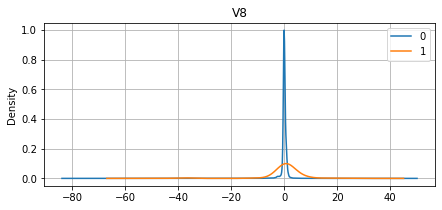

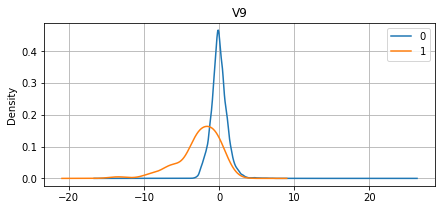

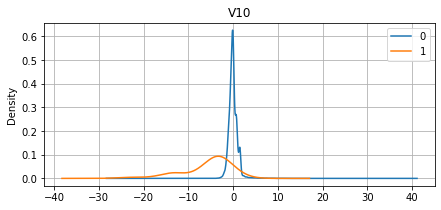

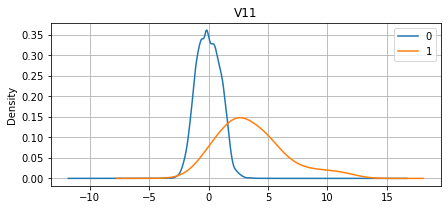

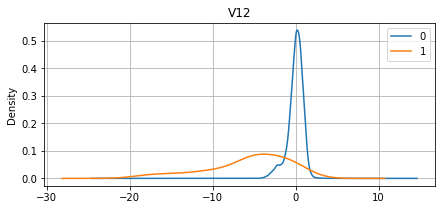

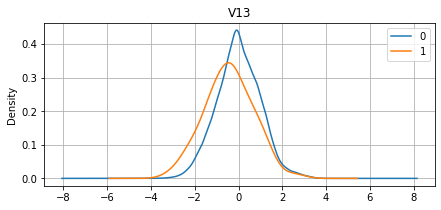

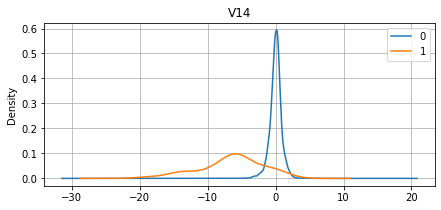

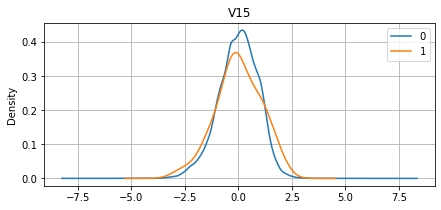

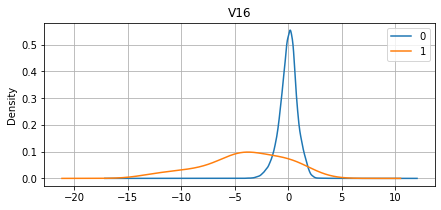

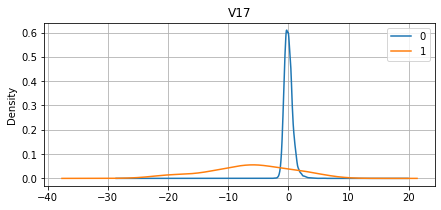

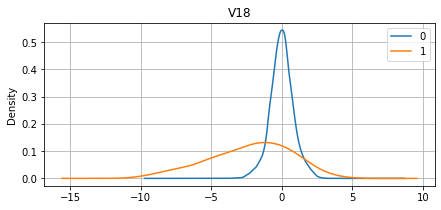

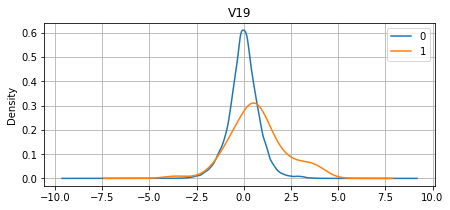

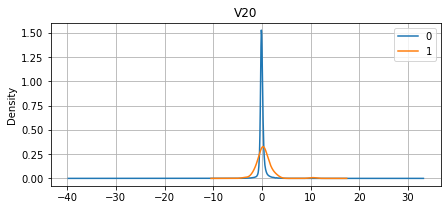

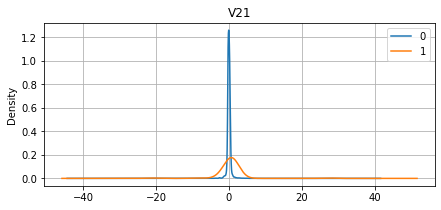

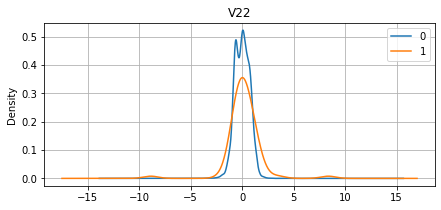

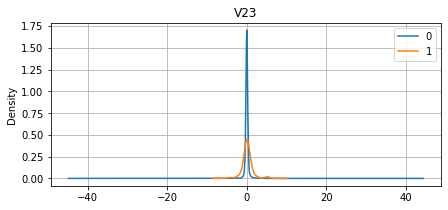

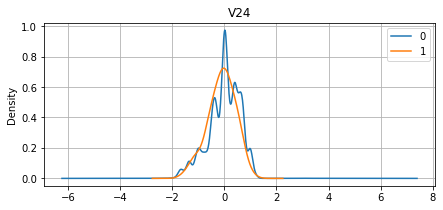

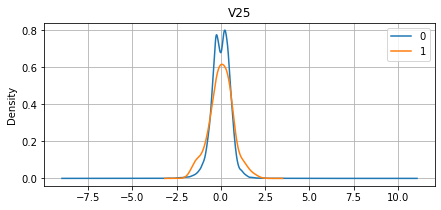

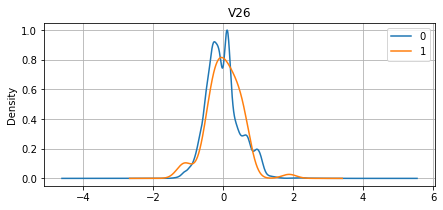

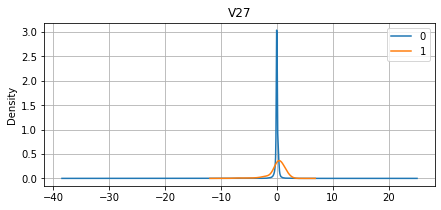

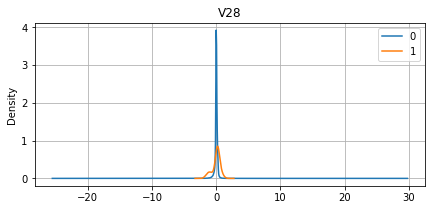

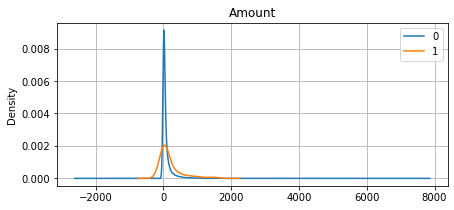

In [14]:
# построю kde 

columns_temp = df.select_dtypes(['float64']).columns

for el in columns_temp:
    fig, ax = plt.subplots(figsize = (7,3))
    ax1 = df.loc[df['Class'] == 0, el].plot(kind='kde', ax = ax)
    ax2 = df.loc[df['Class'] == 1, el].plot(kind='kde', ax = ax, grid = True, title = el).legend(['0', '1'])

C:\Users\smndy\AppData\Local\Temp\ipykernel_5160\1084998911.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (7,3))


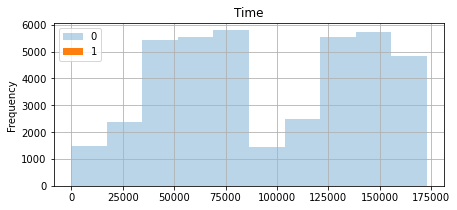

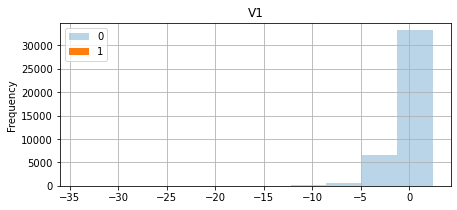

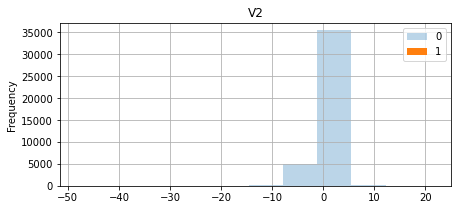

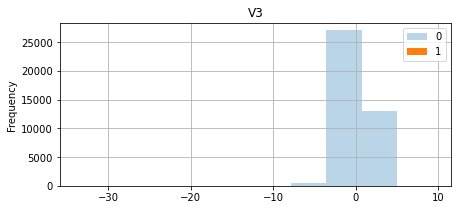

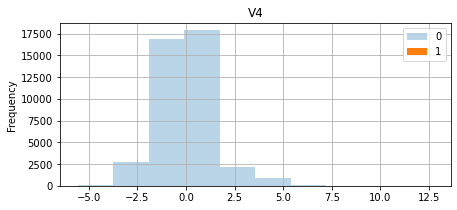

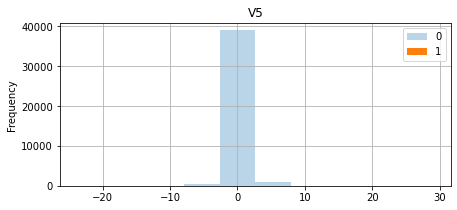

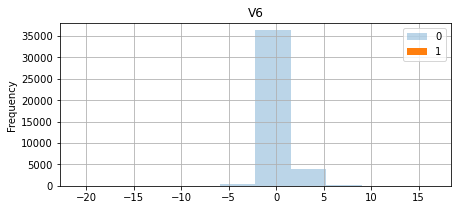

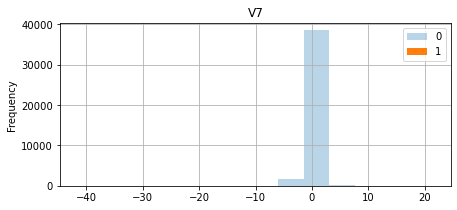

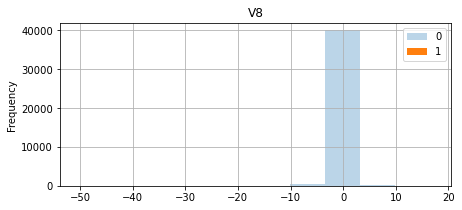

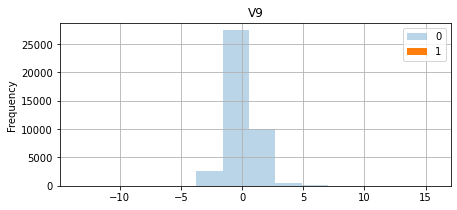

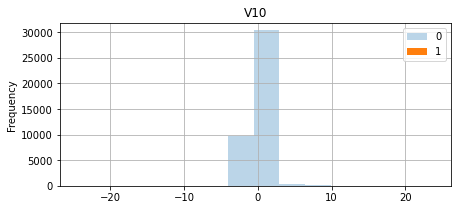

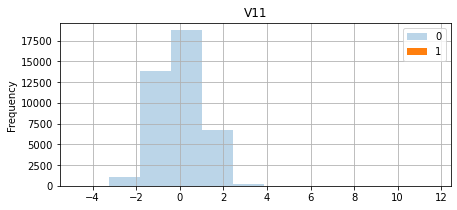

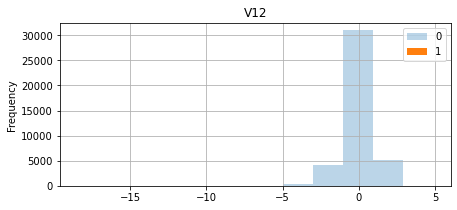

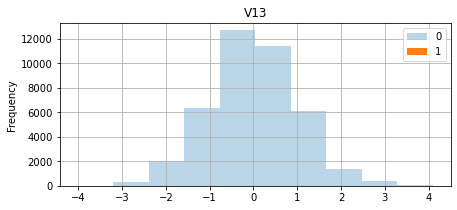

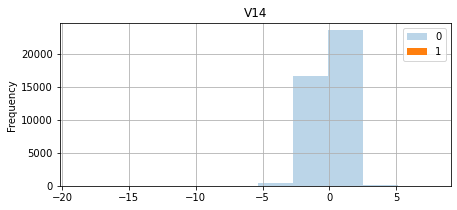

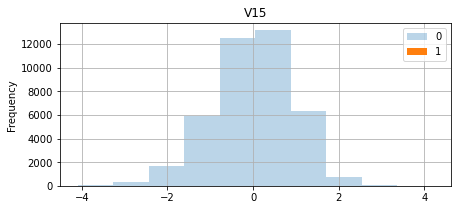

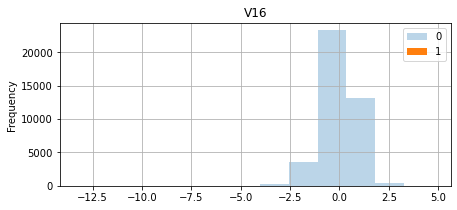

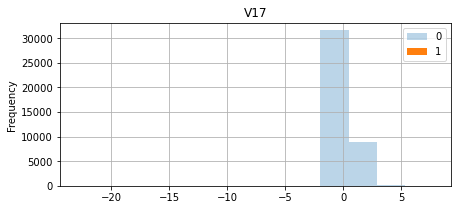

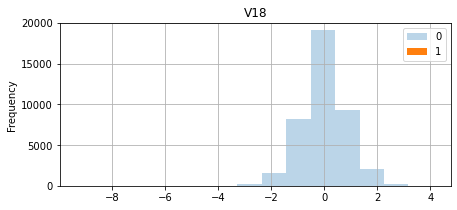

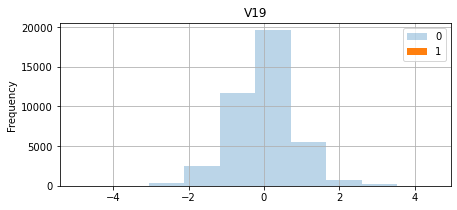

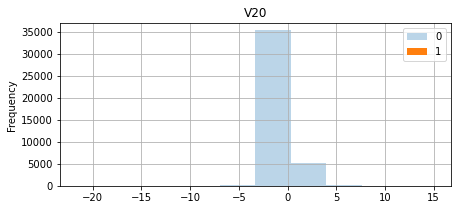

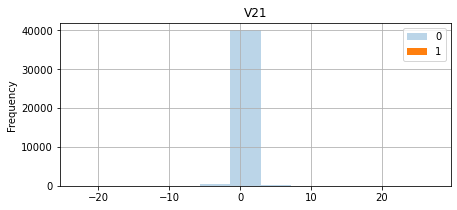

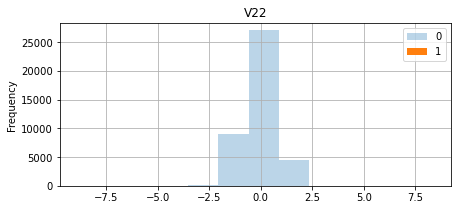

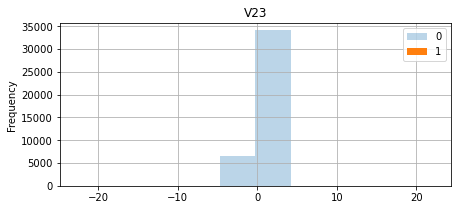

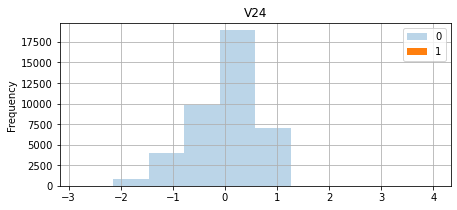

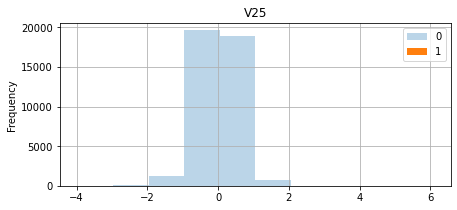

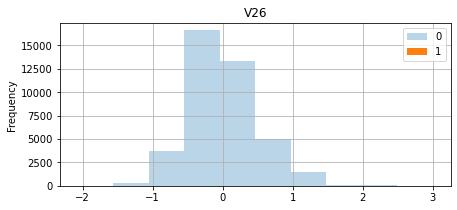

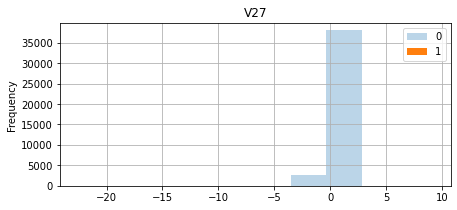

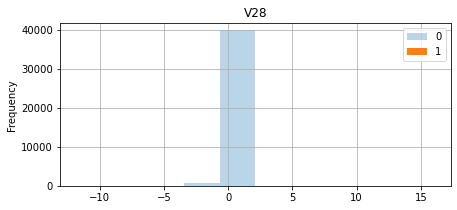

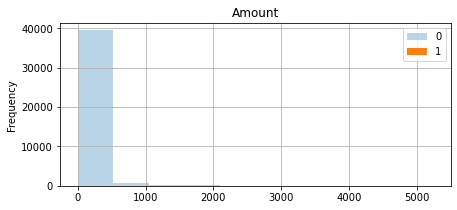

In [15]:
# построю hist 

columns_temp = df.select_dtypes(['float64']).columns

for el in columns_temp:
    fig, ax = plt.subplots(figsize = (7,3))
    ax1 = df.loc[df['Class'] == 0, el].plot(kind='hist', ax = ax, alpha = 0.3)
    ax2 = df.loc[df['Class'] == 1, el].plot(kind='hist', ax = ax, grid = True, title = el).legend(['0', '1'])

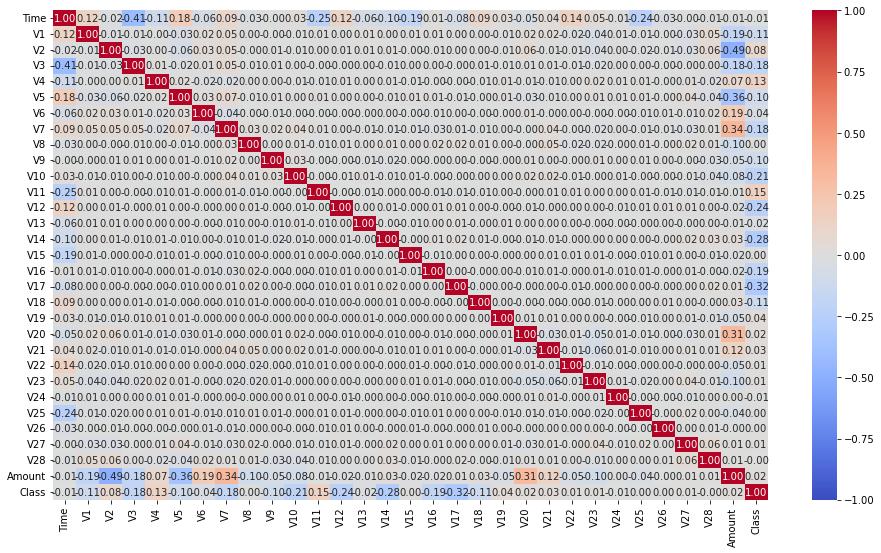

In [16]:
df.corr() # - матрица корреляций [прямолинейная связь, y = kx +b]
plt.subplots(figsize=(16,9))
sns.heatmap(df.corr(), cmap=sns.color_palette("coolwarm", 10000), annot=True, fmt='.2f', vmin=-1, center=0)
plt.show()

interval columns not set, guessing: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
interval columns not set, guessing: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


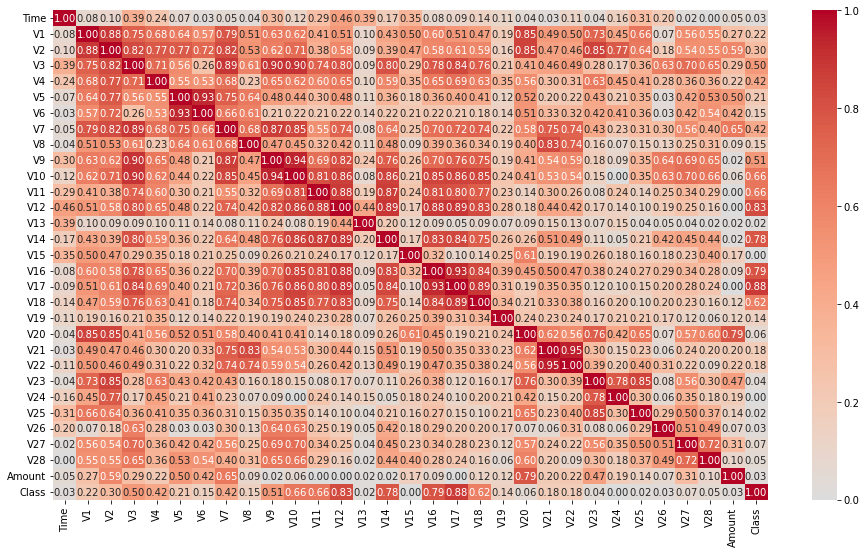

In [17]:
import phik

df.phik_matrix() # - матрица phik корреляций
plt.subplots(figsize=(16,9))
sns.heatmap(df.phik_matrix(), cmap=sns.color_palette("coolwarm", 10000), annot=True, fmt='.2f', vmin=0, center=0)
plt.show()


### Вывод
 - kde лучше чем hist
 - phik_matrix дает новую информаци

# 3 Воспользуйтесь процентом аномалий, подсчитанным по переменной Class, как "экспертной оценкой" загрязненности нашего датасета

In [18]:
df['Class'].value_counts(normalize = False).loc[1] 

71

In [19]:
outliers_percentage_actual = df['Class'].value_counts(normalize = True).loc[1] * 100 
outliers_percentage_actual

0.17450720149437152

# 4 Попробуйте построить различные модели и алгоритмы, разобранные на занятии, используя полученную экспертную оценку для настройки параметров.

In [20]:
df_features = df.drop('Class', axis=1)

In [21]:
# Scaler-ование

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_scaled = pd.DataFrame(data=scaler.fit_transform(df_features), columns=df_features.columns)
df_features_scaled = df_scaled.copy()
df_scaled = pd.concat([df_scaled.reset_index(), df['Class'].reset_index()], axis = 1)

In [22]:
list(df_scaled['Class']) == list(df['Class']) #проверю, что столбец 'Class' не сместился

True

In [23]:
df_scaled = df_scaled.drop(columns='index') #удалю columns='index'

#### отрисую с на x-y осях 

In [24]:
df_scaled_sample = df_scaled.sample(n=5000, random_state=42) #n взято чтобы не тормозило

X_sample = df_scaled_sample.drop(columns = 'Class')
y_sample = df_scaled_sample['Class']
X = df_scaled.drop(columns='Class')
y = df_scaled['Class']

In [25]:
X_sample.shape, X.shape, y_sample.shape, y.shape

((5000, 30), (40686, 30), (5000,), (40686,))

##### отрису tsne

In [26]:
from sklearn.manifold import TSNE
#from MulticoreTSNE import MulticoreTSNE as TSNE

tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
tsne_transformed = tsne.fit_transform(X_sample)

C:\Users\smndy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\smndy\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


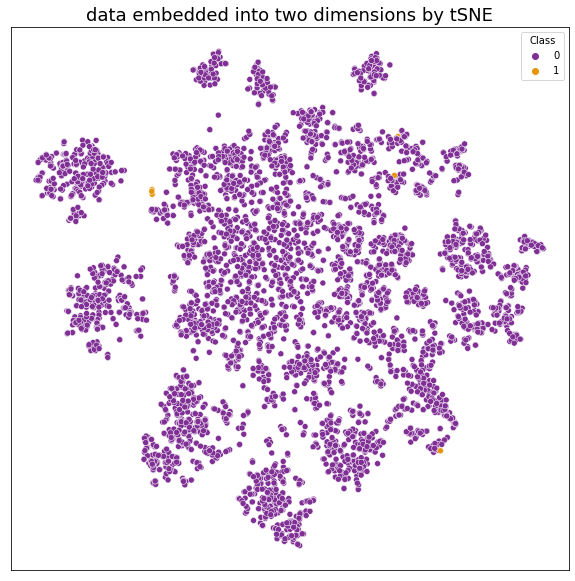

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(
    x=tsne_transformed[:, 0],
    y=tsne_transformed[:, 1], 
    hue=y_sample.astype(int), 
    palette="CMRmap",
    legend='full'
)
plt.title("data embedded into two dimensions by tSNE", fontsize=18)
plt.setp(ax, xticks=[], yticks=[])
plt.show()

##### отрисую umap

In [28]:
import umap 

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X_sample)

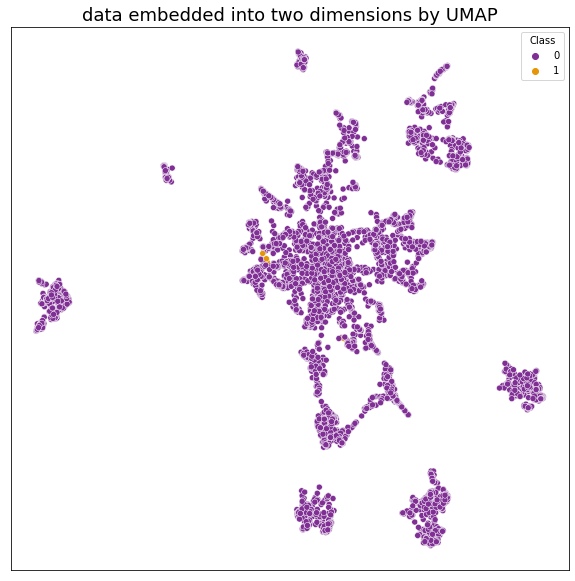

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(
    x=embedding[:, 0], 
    y=embedding[:, 1], 
    hue=y_sample.astype(int), 
    palette="CMRmap", 
    legend='full'
)
plt.setp(ax, xticks=[], yticks=[])
plt.title("data embedded into two dimensions by UMAP", fontsize=18)

plt.show()

### Поиск аномалий

In [30]:
#функция, которая по заданной функции поиска аномалий будет собирать все аномалии, 
def get_outliers(data, function, threshold=3):
    outliers = pd.Series(data=[False]*len(data), index=data.index, name='is_outlier')
    
    for column in data.columns:
        anomalies = function(data, column, threshold=threshold)       
        outliers[anomalies[anomalies].index] = True        
    
    return outliers

#а также функцию, которая будет подсчитывать их процент.
def anomalies_report(outliers):
    print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}".format(
            sum(outliers), 100*sum(outliers)/len(outliers)))  

In [31]:
#3-сигмы
def outlier_std(data, column, threshold=3):
    mean = data[column].mean()
    std = data[column].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[column]>up_bound, data[column]<low_bound], axis=1).any(1)
    return anomalies

In [32]:
std_outliers = get_outliers(df_features, function=outlier_std)
anomalies_report(std_outliers)

Total number of outliers: 5544
Percentage of outliers:   13.63


In [33]:
#Межквартильное отклонение
def outlier_iqr(data, column, threshold=3):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    up_bound = data[column].quantile(0.75) + (IQR * threshold)
    low_bound = data[column].quantile(0.25) - (IQR * threshold)
    anomalies = pd.concat([data[column]>up_bound, data[column]<low_bound], axis=1).any(1)
    return anomalies

In [34]:
iqr_outliers = get_outliers(df_features, function=outlier_iqr)
anomalies_report(iqr_outliers)

Total number of outliers: 7695
Percentage of outliers:   18.91


In [35]:
#Distance-based
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist

class DistanceOutliers(BaseEstimator):

    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile
        
    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)
        
    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

In [36]:
# Distance-based. Euclidean metric. Работаю со df_features_scaled
euclidian_model = DistanceOutliers(metric='euclidean', percentile=100-outliers_percentage_actual)
euclidian_model.fit(df_features_scaled)
euclidian_outliers = euclidian_model.predict(df_features_scaled)
anomalies_report(euclidian_outliers)

Total number of outliers: 71
Percentage of outliers:   0.17


In [37]:
# Distance-based. Cityblock metric# Distance-based. 
cityblock_model = DistanceOutliers(metric='cityblock', percentile=100-outliers_percentage_actual)
cityblock_model.fit(df_features_scaled)
cityblock_outliers = cityblock_model.predict(df_features_scaled)
anomalies_report(cityblock_outliers)

Total number of outliers: 71
Percentage of outliers:   0.17


In [38]:
#Density-based DBSCAN подбор eps

from sklearn.cluster import DBSCAN

threshold = 100*outliers_percentage_actual/100 # увеличил, чтобы хоть что-то посчитать

# для начала считаем все наблюдения аномальными
outlier_percentage = 1 

num_clusters = []
anomaly_percentage = []

# берем маленький эпсилон и начинаем увеличивать
eps = 0.05
eps_history = [eps]
print(threshold)
while outlier_percentage>threshold:    
    print(outlier_percentage)
    model = DBSCAN(eps=eps).fit(df_features_scaled)
    labels = model.labels_
    num_clusters.append(len(np.unique(labels))-1)
    labels = np.array([1 if label == -1 else 0 for label in labels])
    # считаем текущий процент "шума"
    outlier_percentage = sum(labels==1) / len(labels)    
    eps += 0.5 #было 0.05 увеличил шаг чтобы хоть что-то посчитать
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)

0.17450720149437152
1
0.9977387799242983
0.8891019023742811
0.7224598141866981
0.5472644152779826
0.3930590375067591
0.2554441331170427


In [39]:
#цикл остановлися для eps = 
eps

3.55

In [40]:
#Density-based DBSCAN fit 
DBSCAN_model = DBSCAN(eps)
DBSCAN_model.fit(df_features_scaled)
DBSCAN_outlier = np.array([1 if label == -1 else 0 for label in DBSCAN_model.labels_])

anomalies_report(DBSCAN_outlier)

Total number of outliers: 4484
Percentage of outliers:   11.02


### вывод проверил DBSCAN.

In [41]:
# Unsupervised model-based. One-Class SVM. Работаю с df_features_scaled
from sklearn.svm import OneClassSVM

one_class_svm = OneClassSVM(nu=outliers_percentage_actual/100, gamma='auto')
one_class_svm.fit(df_features_scaled)
svm_outliers = one_class_svm.predict(df_features_scaled)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

In [42]:
anomalies_report(svm_outliers)

Total number of outliers: 899
Percentage of outliers:   2.21


In [43]:
# Unsupervised model-based. Isolation Forest. Работаю с df_features_scaled
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination=outliers_percentage_actual/100, 
                                   max_features=1.0, bootstrap=True, n_jobs=-1)
isolation_forest.fit(df_features_scaled)

isolation_outliers = isolation_forest.predict(df_features_scaled)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

C:\Users\smndy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


# 5 Проверка качества моделей

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

outliers_quality = pd.DataFrame({"metric":["Precision", "Recall", "F1-score", "TP", "FN", "FP"]})
outliers_quality.set_index("metric")

""
metric
Precision
Recall
F1-score
TP
FN
FP


In [45]:
def fill_report(outliers_quality, y_true, y_pred, model_name):
    report = precision_recall_fscore_support(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)
    outliers_quality[model_name] = [report[0][1], report[1][1], report[2][1],
                                    matrix[1][1], matrix[1][0], matrix[0][1]]    

In [46]:
fill_report(outliers_quality, df['Class'], std_outliers, '3-sigm')
fill_report(outliers_quality, df['Class'], iqr_outliers, 'IQR')
fill_report(outliers_quality, df['Class'], euclidian_outliers, 'Euclidian')
fill_report(outliers_quality, df['Class'], cityblock_outliers, 'Cityblock')
fill_report(outliers_quality, df['Class'], svm_outliers, 'SVM')
fill_report(outliers_quality, df['Class'], isolation_outliers, 'Isolation')

outliers_quality

,metric,3-sigm,IQR,Euclidian,Cityblock,SVM,Isolation
0,Precision,0.011544,0.008707,0.042254,0.225352,0.036707,0.253521
1,Recall,0.901408,0.943662,0.042254,0.225352,0.464789,0.253521
2,F1-score,0.022796,0.017255,0.042254,0.225352,0.068041,0.253521
3,TP,64.000000,67.000000,3.000000,16.000000,33.000000,18.000000
4,FN,7.000000,4.000000,68.000000,55.000000,38.000000,53.000000
5,FP,5480.000000,7628.000000,68.000000,55.000000,866.000000,53.000000


# Вывод: 
1. Проверка проведена на 1/7 дата-сета
2. DBSCAN не включил в отчет, долго считает, приведена урезанная версия до епсилон = eps
3. Для прорисовки методом tsne, umap использовал 5000 наблюдей 
4. простые методы хорошо справляются с поиском аномалий, но при это захватывают слишком много лишних объектов. 
5. Модели, основанные на расстоянии показали себя по разному, но все процент правильно найденных аномалий достаточно мал. Похожую картину наблюдаем и в модели Isolation Forest. SVM нашел верно большее количество аномалий, но при этом пометил и большое количество ложно положительных объектов.
